# Task 5: Binary Classification with Logistic Regression 

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [3]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
X = breast_cancer.data
y = breast_cancer.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [6]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [7]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [8]:
# Accuracy 
accuracy_score(y_test, y_pred)

0.956140350877193

In [9]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [ 1, 70]])

In [10]:
# Precision, Recall, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9459459459459459
0.9859154929577465
0.9655172413793104


In [11]:
#  roc curve
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_prob)

0.9977071732721913

# Task 6: Threshold Tuning and Probability Interpretation 

In [ ]:
# probability of positive class
y_prob = clf.predict_proba(X_test)[:,1]
y_prob

array([8.78417737e-01, 3.04735433e-08, 1.59969809e-03, 9.98775726e-01,
       9.99858607e-01, 2.00253498e-10, 6.15347950e-11, 1.92820681e-02,
       9.84264981e-01, 9.94311003e-01, 9.29270359e-01, 8.09446888e-04,
       9.88907827e-01, 1.76075741e-01, 9.99212570e-01, 1.74968272e-03,
       9.98803857e-01, 9.99987939e-01, 9.99999387e-01, 7.22142596e-07,
       8.27778678e-01, 9.92295256e-01, 6.21088494e-09, 9.99662491e-01,
       9.96530414e-01, 9.99758501e-01, 9.98974884e-01, 9.98978180e-01,
       9.95311622e-01, 7.41846222e-09, 9.98535358e-01, 9.99762181e-01,
       9.99107461e-01, 9.86395780e-01, 9.99883544e-01, 9.99050996e-01,
       2.07437025e-03, 9.98986277e-01, 1.00852442e-05, 7.18898594e-01,
       9.99782212e-01, 6.22986310e-04, 9.99539044e-01, 9.96009202e-01,
       9.99756991e-01, 9.82900274e-01, 9.99967920e-01, 9.99522850e-01,
       9.59469632e-01, 9.98578390e-01, 9.47005926e-05, 2.91077079e-09,
       8.61050080e-01, 9.99608713e-01, 9.99399476e-01, 9.86139467e-01,
      

In [17]:
from sklearn.metrics import f1_score

threshold = [0.2, 0.4, 0.6, 0.8]
for th in threshold:
    y_pred_thresh = (y_prob >= th).astype(int)
    print(f"\n For threshold: {th} = ")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
    print("F1-score:", f1_score(y_test, y_pred_thresh))




 For threshold: 0.2 = 
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1-score: 0.9655172413793104

 For threshold: 0.4 = 
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1-score: 0.9655172413793104

 For threshold: 0.6 = 
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1-score: 0.9790209790209791

 For threshold: 0.8 = 
Confusion Matrix:
 [[42  1]
 [ 2 69]]
F1-score: 0.9787234042553191


In [25]:

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
f1_scores = [f1_score(y_test, (y_prob >= th).astype(int)) for th in thresholds]
best_idx = max(range(len(f1_scores)), key=lambda i: f1_scores[i])
optimal_threshold = thresholds[best_idx]



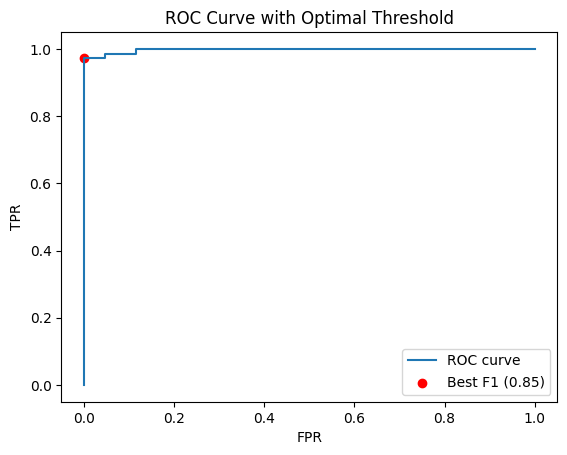

In [26]:
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', label=f'Best F1 ({optimal_threshold:.2f})')
plt.xlabel('FPR'); 
plt.ylabel('TPR')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.show()


# Task 7: Multiclass Classification 

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [ ]:
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Questions

Answer the following in brief (2–4 sentences each)

1. What are the assumptions of linear regression? 
* linearity between features and the target
* independence of errors
* homoscedasticity

2. When should you use logistic regression instead of linear regression? 
* Use logistic regression when the target variable is categorical (typically binary).

3. What is the interpretation of coefficients in logistic regression? 
* The coefficients represent the change in the log-odds of the target being the positive class for a one-unit increase in the corresponding feature, holding other features constant; exponentiating the coefficient gives the odds ratio.


4. What is the difference between sigmoid and softmax functions? 
* The sigmoid function outputs a probability between 0 and 1 for binary classification, while the softmax function generalizes this to multiclass problems by outputting a probability distribution across multiple classes.

5. Why is R-squared not suitable for evaluating logistic regression 
models?
* R-squared measures the proportion of variance explained in a continuous regression task but logistic regression predicts class probabilities, so metrics like accuracy, F1 and ROC-AUC are more appropriate.